**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

**Loading Dataset and Identification of Variables and Datatypes**

In [2]:
data = pd.read_csv("bike_sharing.csv")
print(f"Shape of Dataset is : {data.shape}","\n")
print(f"No of Records in Dataset : {data.shape[0]}","\n")
print(f"No of Columns in Dataset : {data.shape[1]}","\n")
print(f"Data Info : {data.info()}")

Shape of Dataset is : (10886, 12) 

No of Records in Dataset : 10886 

No of Columns in Dataset : 12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
Data Info : None


**Observation :**

1. No of Records in Dataset are 10886 with total columns of 12.

2. Out of total 12 columns, 11 columns are Numerical variables and 1 variable is categorical.

3. "datetime" is of object type hence it has to be converted to datetime format.

In [3]:
# Converting datatime column to datetime64 format
data["datetime"] = pd.to_datetime(data["datetime"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


**Sample records to verify how the data looks like**

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Analyzing basic metrics of dataset**

In [5]:
data[data.duplicated()] # No Duplicate records available

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [6]:
null_values = data.isna().sum().reset_index()
null_values.rename(columns={"index":"column_name",0:"null_count"},inplace=True)
null_values
# No null values are available.

,column_name,null_count
0,datetime,0
1,season,0
2,holiday,0
3,workingday,0
4,weather,0
5,temp,0
6,atemp,0
7,humidity,0
8,windspeed,0
9,casual,0


In [7]:
uniq_values = data.nunique().reset_index()
uniq_values.rename(columns={"index":"column_name",0:"uniq_value_cnt"},inplace=True)
uniq_values

,column_name,uniq_value_cnt
0,datetime,10886
1,season,4
2,holiday,2
3,workingday,2
4,weather,4
5,temp,49
6,atemp,60
7,humidity,89
8,windspeed,28
9,casual,309


In [9]:
column = list(data.columns)
cols = ["datetime","temp","atemp","humidity","windspeed","casual","registered","count"]
for i in cols:
  column.remove(i)
for col in column:
  print(f"Unique values in column {col} : {data[col].unique()} and count of unique values is {data[col].nunique()}","\n")

Unique values in column season : [1 2 3 4] and count of unique values is 4 

Unique values in column holiday : [0 1] and count of unique values is 2 

Unique values in column workingday : [0 1] and count of unique values is 2 

Unique values in column weather : [1 2 3 4] and count of unique values is 4 



**Basic Stats for quick overview of central tendency and dispersion of continuous variables**

In [10]:
selec_cols = ["temp","atemp","humidity","windspeed","casual","registered","count"]
data[selec_cols].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


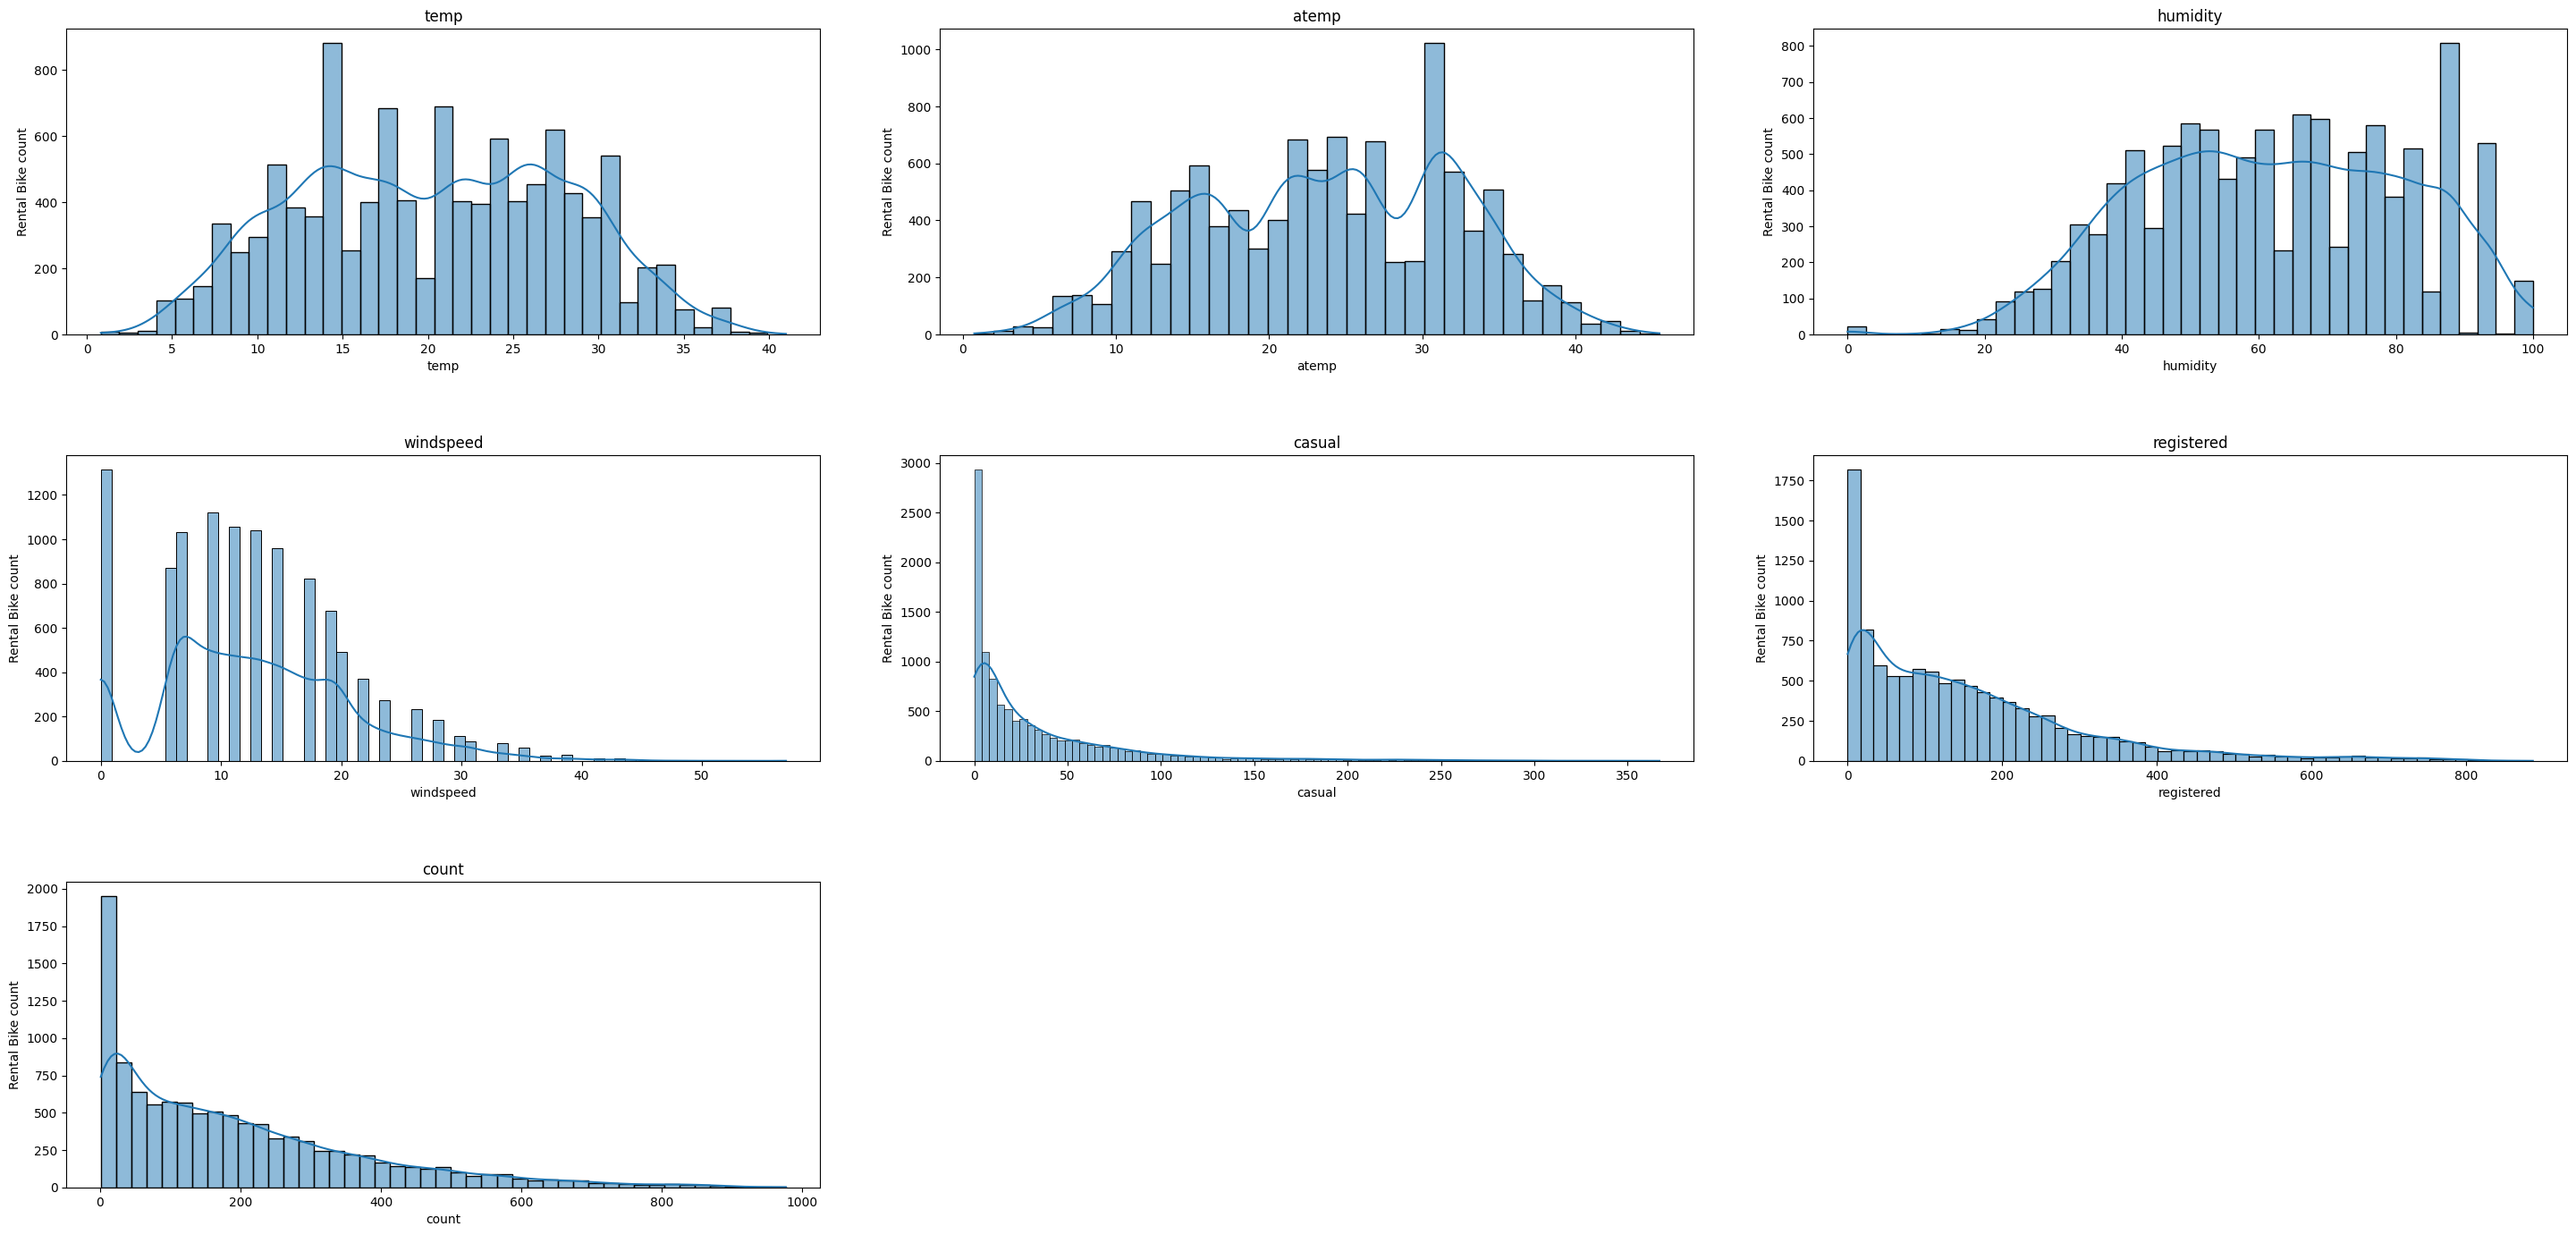

In [11]:
fig_hist = plt.figure(figsize=(30,15))
for i in range(len(selec_cols)):
  plt.subplot(3,3,i+1)
  sns.histplot(data[selec_cols[i]], kde=True)
  plt.ylabel("Rental Bike count")
  plt.title(selec_cols[i])
fig_hist.tight_layout(pad=5.0)
plt.show()



**Observation :**

1. From the above histogram plot we can infer that data points of the variables casual, registered and count are positively skewed.

**Identification of Outliers**

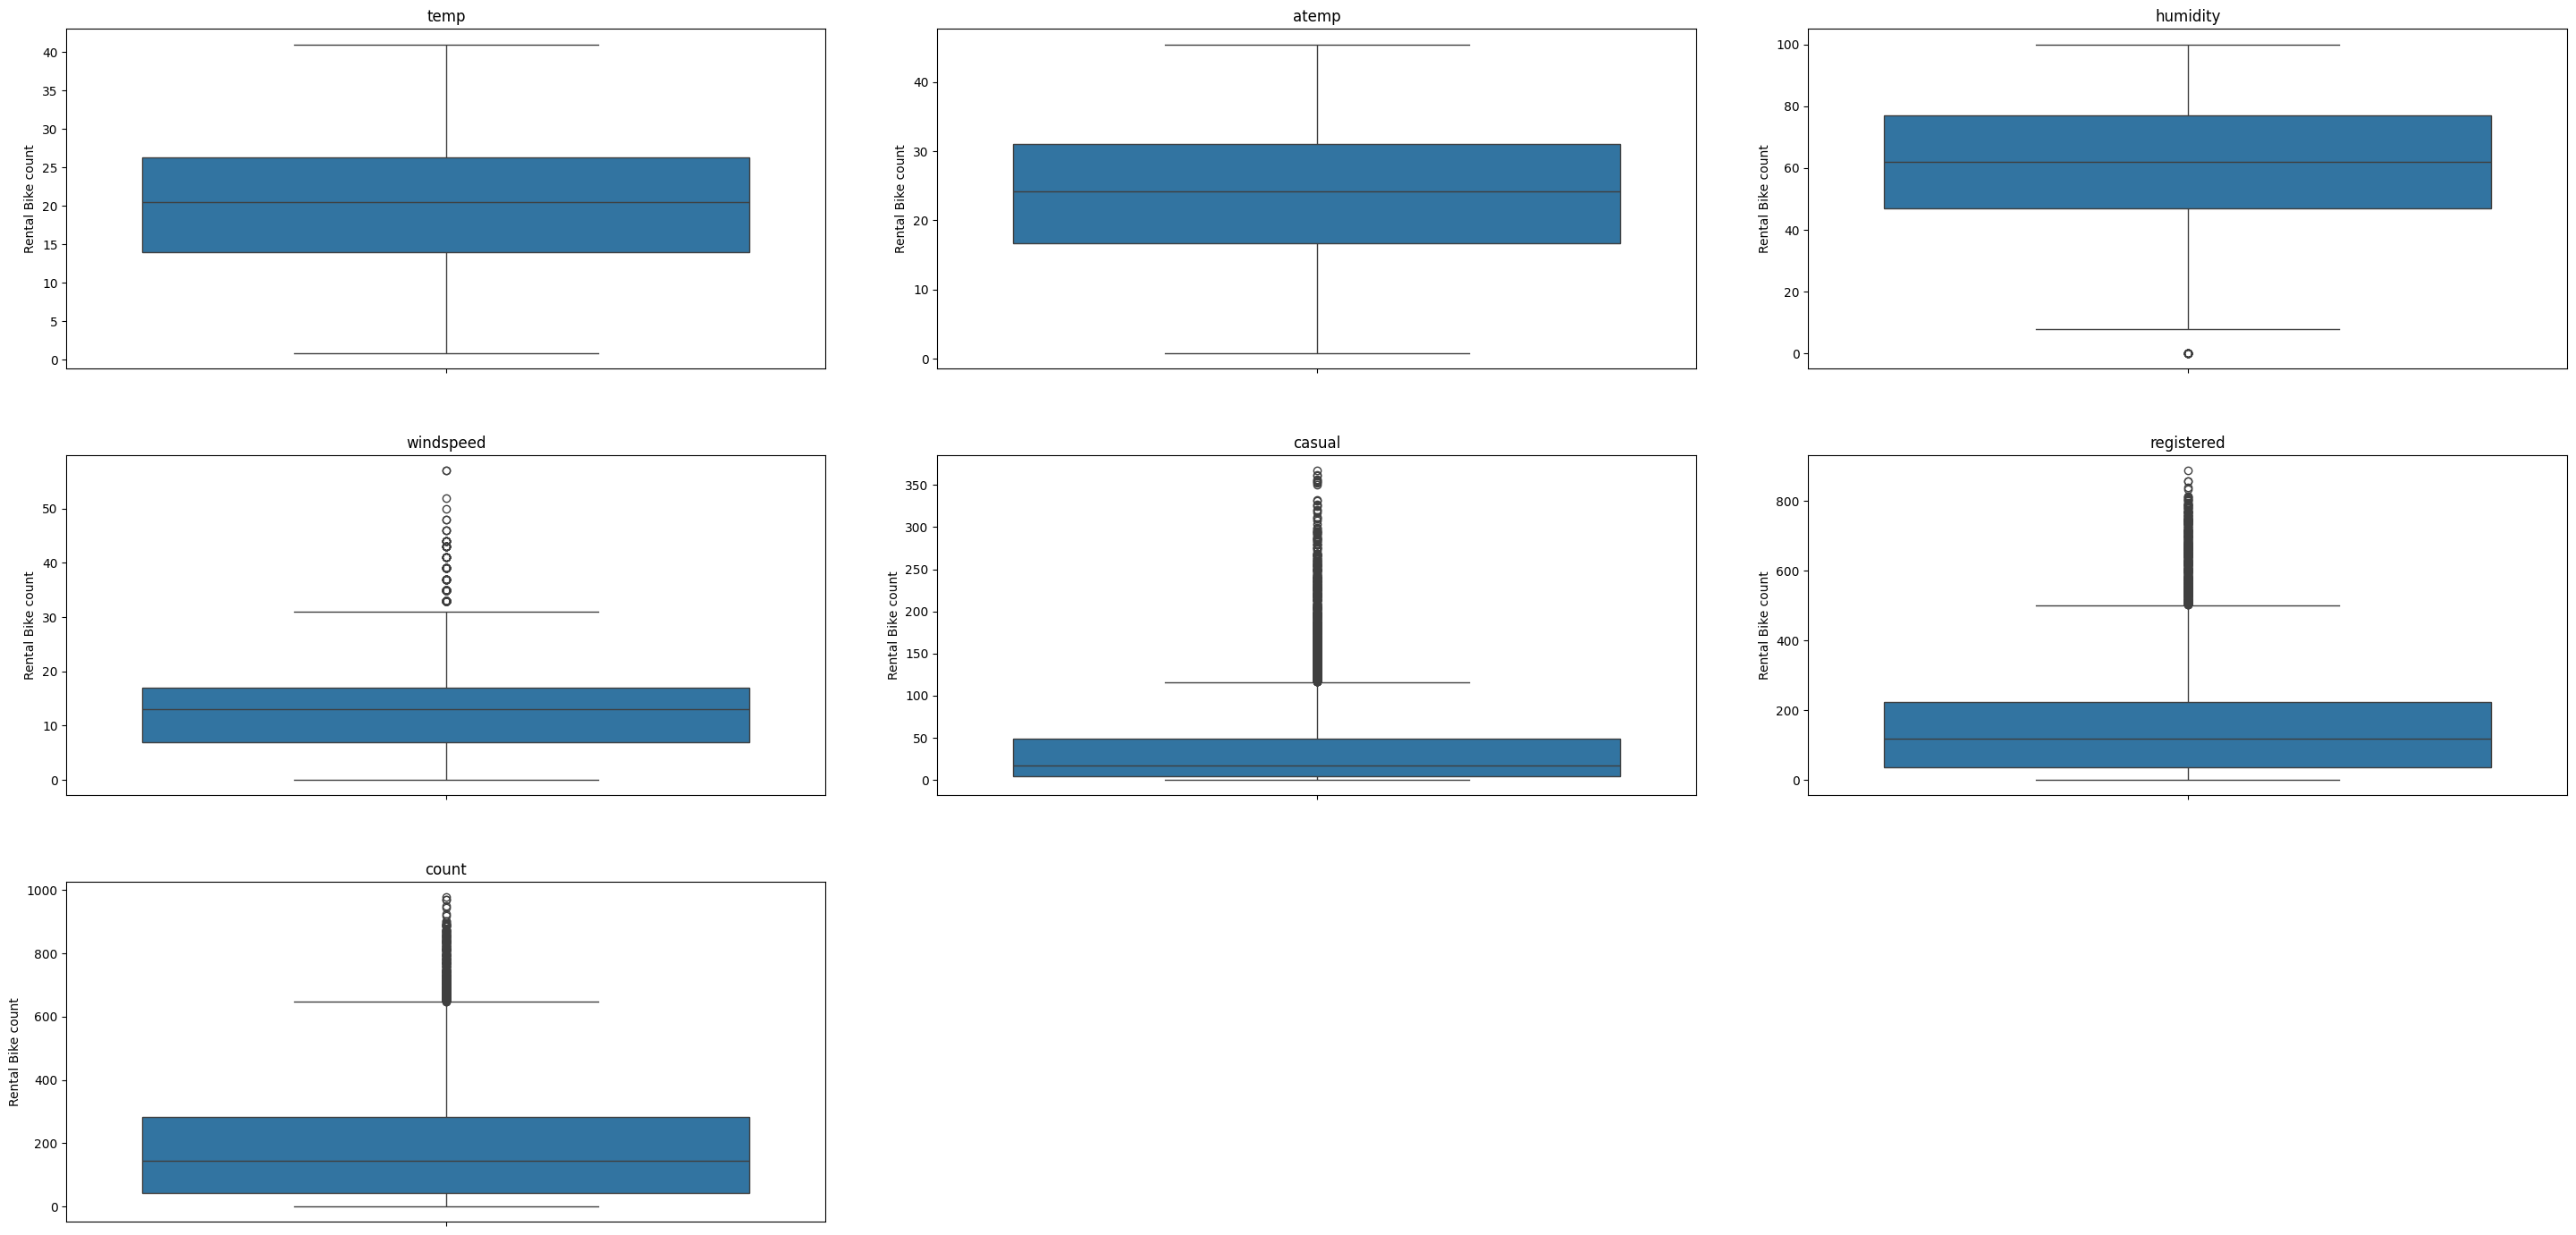

As our dependent variable is 'Count', at present we are focussing on Outlier identification and removal for it 

Lower Bound : -321.0
Upper Bound : 647.0
No of Outliers : 300
Share of outliers : 2.76%
Skewness of count variable before Outlier treatment is : 1.2420662117180776
Kurtosis  of count variable before Outlier treatment is : 1.3000929518398334
Skewness of count variable after Outlier treatment is : 0.9155844120178854
Kurtosis  of count variable after Outlier treatment is : 0.05712315829641046 



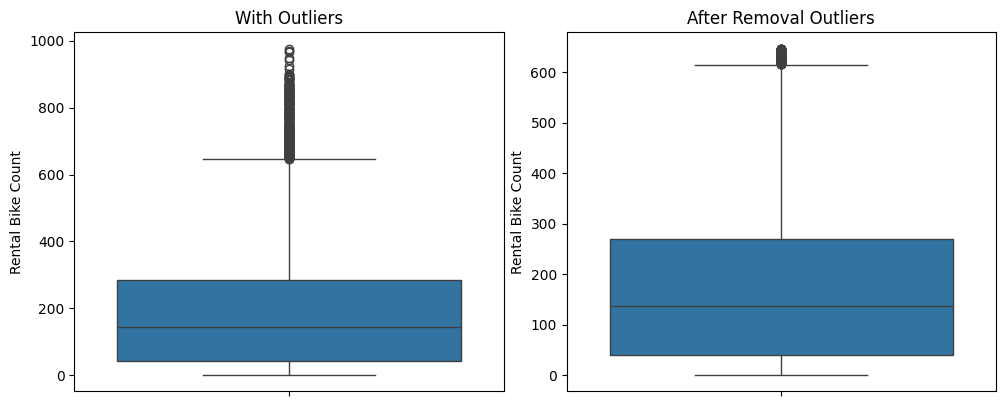

In [12]:
# Identification of outliers using IQR method and removal of outliers
fig_box = plt.figure(figsize=(30,15))

for i in range(len(selec_cols)):
  plt.subplot(3,3,i+1)
  sns.boxplot(data[selec_cols[i]])
  plt.ylabel("Rental Bike count")
  plt.title(selec_cols[i])
fig_box.tight_layout(pad=5.0)
plt.show()

#
print("As our dependent variable is 'Count', at present we are focussing on Outlier identification and removal for it","\n")
q1 = data["count"].quantile(0.25)
q3 = data["count"].quantile(0.75)
IQR = q3-q1

lower_bound = q1-1.5*IQR
upper_bound = q3+1.5*IQR

print(f"Lower Bound : {lower_bound}")
print(f"Upper Bound : {upper_bound}")

outliers = data[(data["count"]<lower_bound)|(data["count"]>upper_bound)]

print(f"No of Outliers : {len(outliers)}")
print(f"Share of outliers : {np.round((len(outliers)/len(data))*100,2)}%")

data_new = data[~((data["count"]<lower_bound)|(data["count"]>upper_bound))]

skew_coef = data["count"].skew()
kurt_coef = data["count"].kurt()
print(f"Skewness of count variable before Outlier treatment is : {skew_coef}")
print(f"Kurtosis  of count variable before Outlier treatment is : {kurt_coef}")

skew_coef = data_new["count"].skew()
kurt_coef = data_new["count"].kurt()
print(f"Skewness of count variable after Outlier treatment is : {skew_coef}")
print(f"Kurtosis  of count variable after Outlier treatment is : {kurt_coef}","\n")

fig1 = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data["count"])
plt.title("With Outliers")
plt.ylabel("Rental Bike Count")
plt.subplot(1,2,2)
sns.boxplot(data_new["count"])
plt.title("After Removal Outliers")
plt.ylabel("Rental Bike Count")
fig1.tight_layout(pad=0.5)
plt.show()


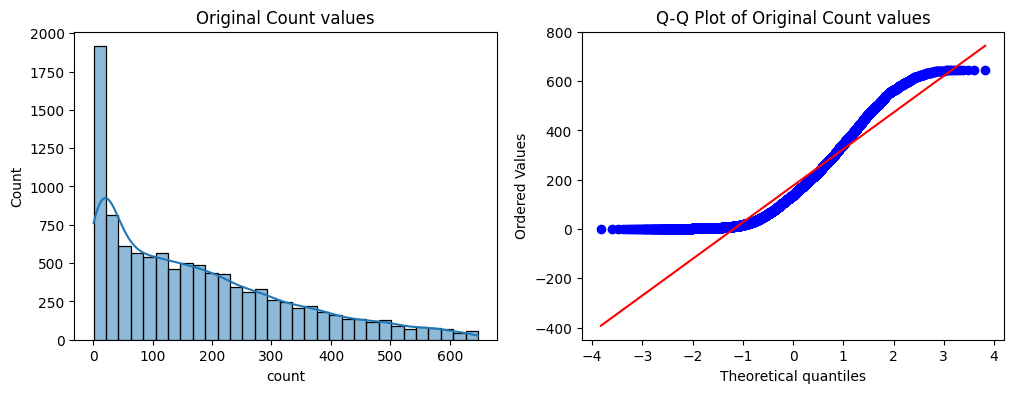

Optimal Lambda (λ): 0.3459590477604692


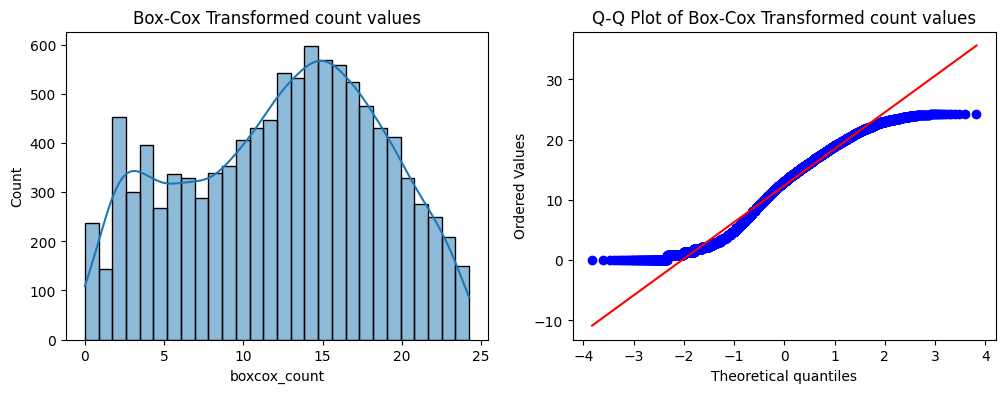

Skewness coefficient of transformed data : -0.1861591600174271
Kurtosis coefficient of transformed data : -0.9361251655867515


In [19]:
# Even though we have removed outliers from "count" attribute the data is still not normally distributed.
# Hence applying boxcox transformation as most of the statistical tests assumes normality and equal variances.


# 1. Visualize the original data
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data_new['count'], kde=True)
plt.title('Original Count values')

plt.subplot(1, 2, 2)
stats.probplot(data_new['count'], dist="norm", plot=plt) #Q-Q plot
plt.title('Q-Q Plot of Original Count values')
plt.savefig("orginal.pdf")
plt.show()


# 2. Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(data_new['count'])  # lambda_value is the optimal lambda

data_new['boxcox_count'] = transformed_data
print(f"Optimal Lambda (λ): {lambda_value}")

# 3. Visualize the transformed data
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data_new['boxcox_count'], kde=True)
plt.title('Box-Cox Transformed count values')

plt.subplot(1, 2, 2)
stats.probplot(data_new['boxcox_count'], dist="norm", plot=plt)  # Q-Q plot
plt.title('Q-Q Plot of Box-Cox Transformed count values')
plt.savefig("boxcox.pdf")
plt.show()

skew_coef = data_new["boxcox_count"].skew()
kurt_coef = data_new["boxcox_count"].kurt()

print(f"Skewness coefficient of transformed data : {skew_coef}")
print(f"Kurtosis coefficient of transformed data : {kurt_coef}")

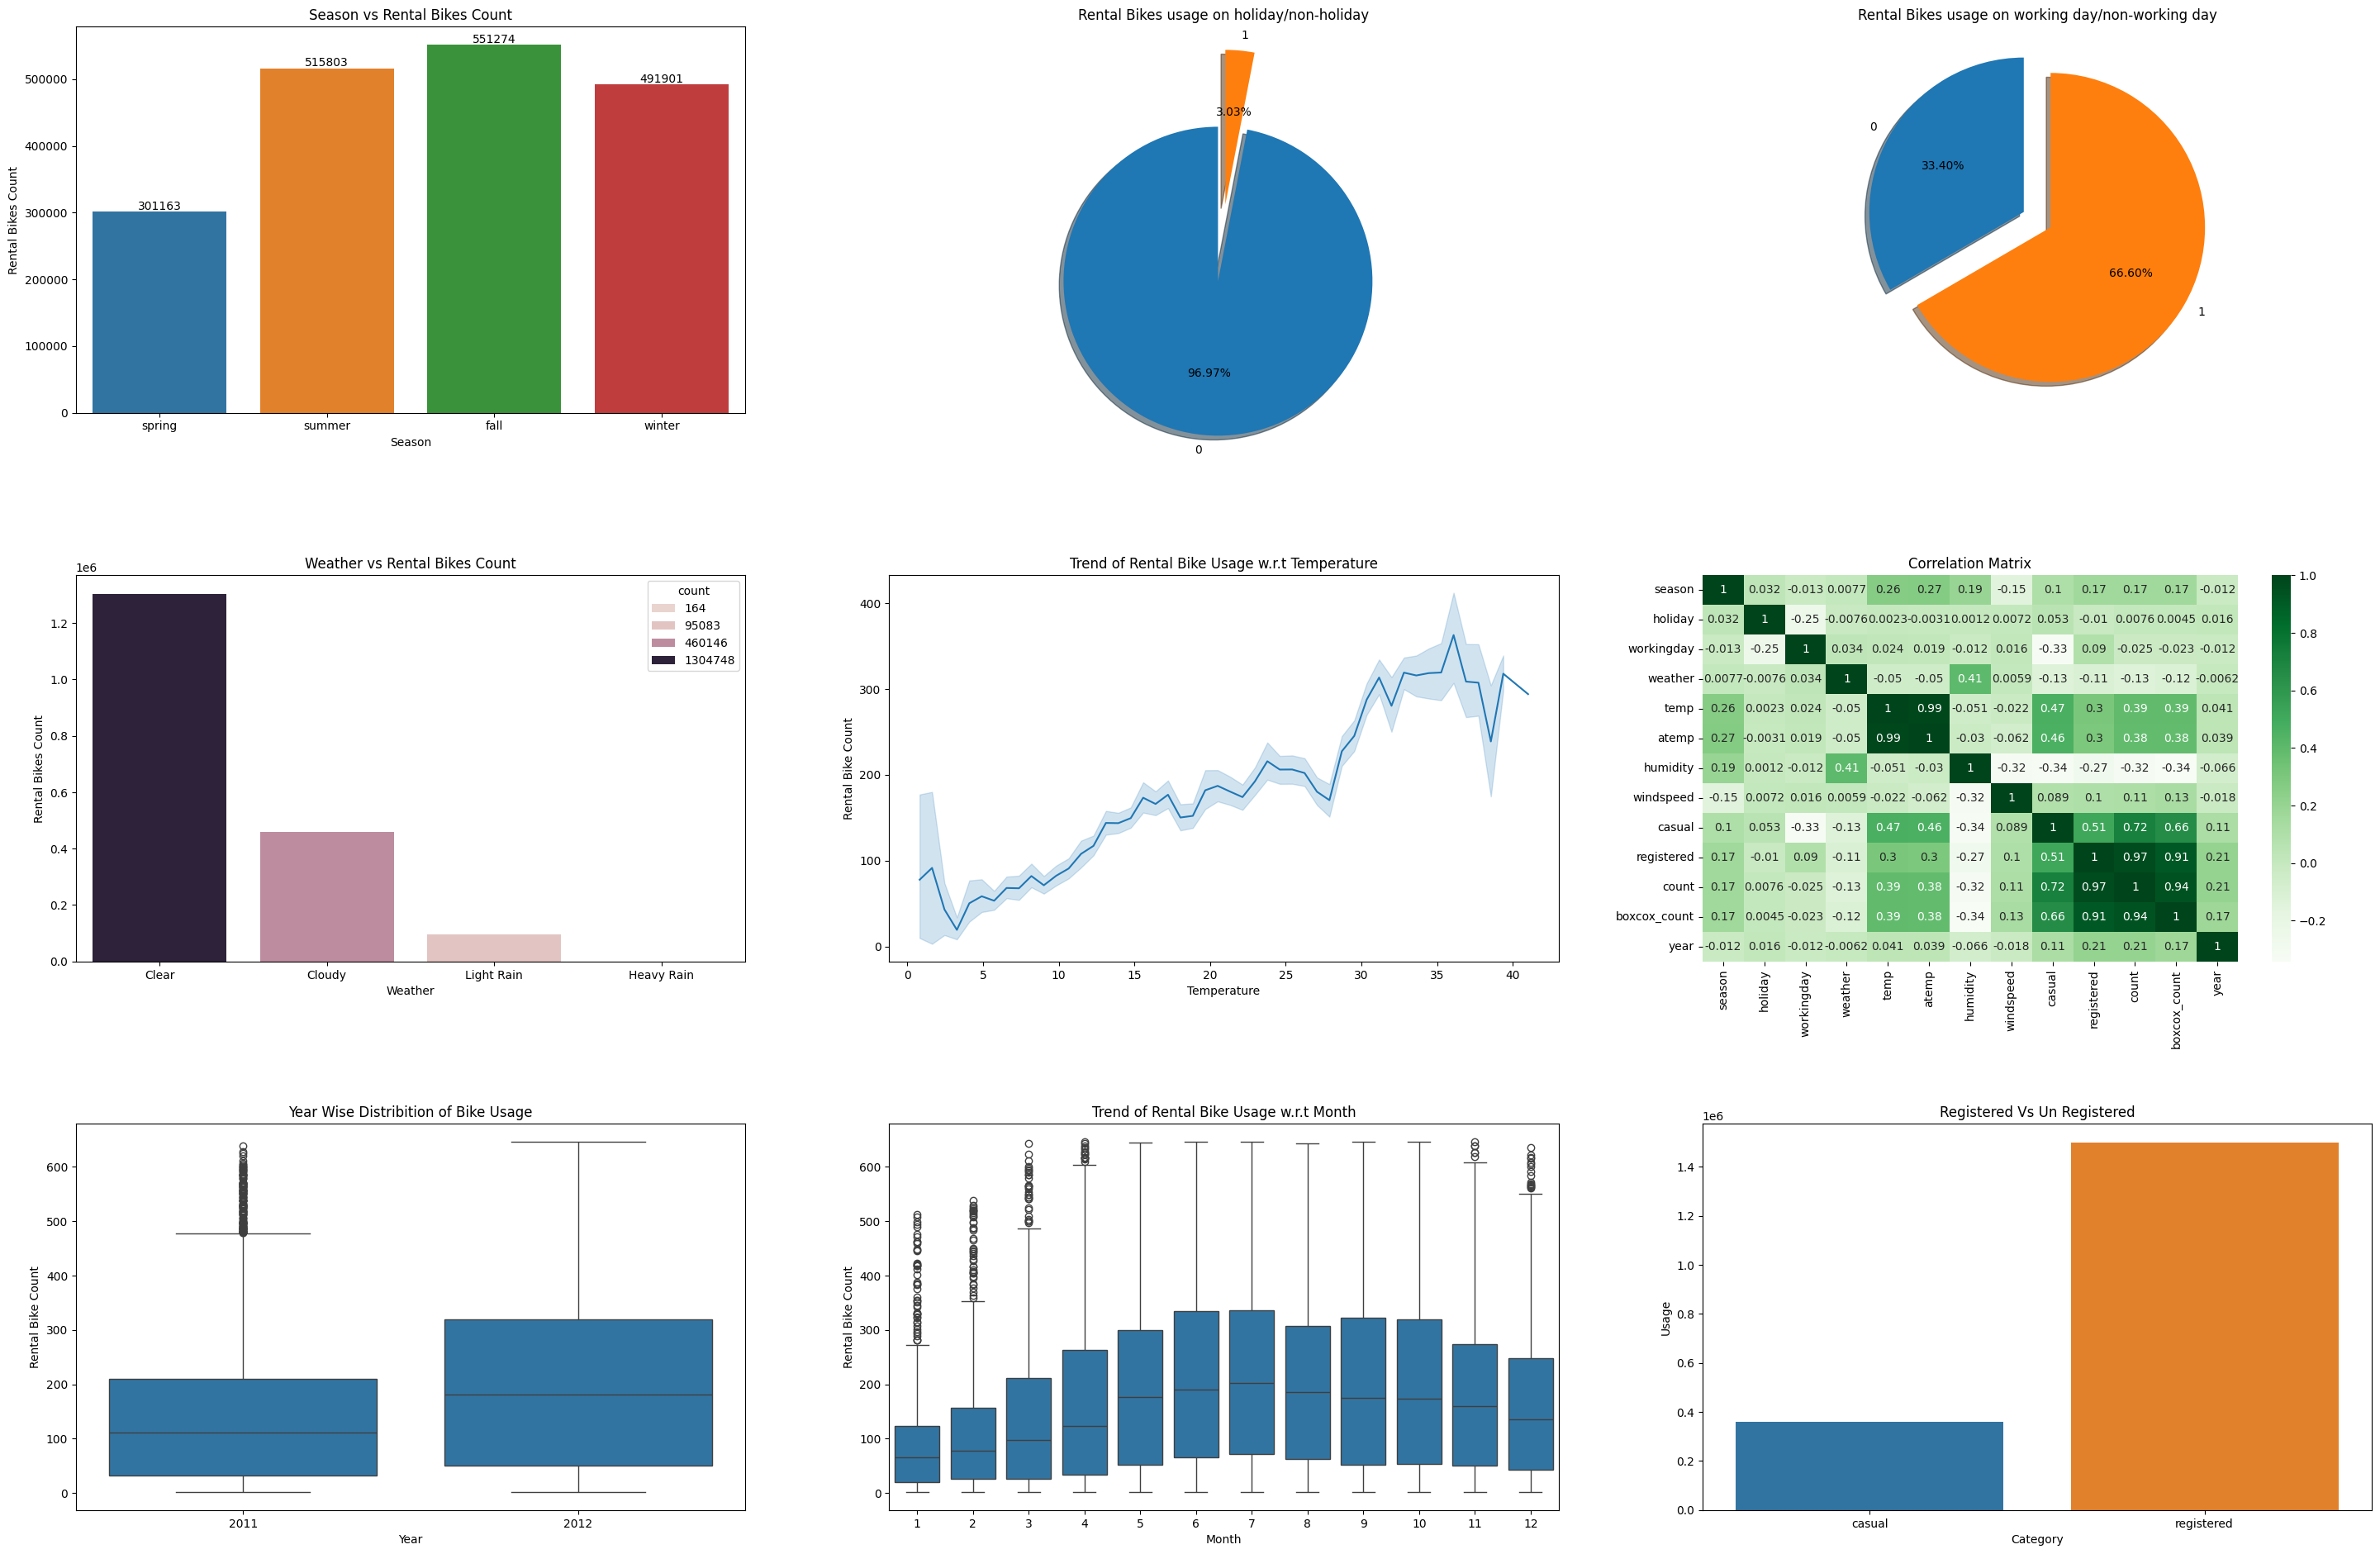

In [26]:
# Column Profiling
# datetime: datetime
# season: season (1: spring, 2: summer, 3: fall, 4: winter)
# holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
# weather:
#   1: Clear, Few clouds, partly cloudy, partly cloudy
#   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temp: temperature in Celsius
# atemp: feeling temperature in Celsius
# humidity: humidity
# windspeed: wind speed
# casual: count of casual users
# registered: count of registered users
# count: count of total rental bikes including both casual and registered

# Problem Statement : Yulu has recently suffered considerable dips in its revenues.
# Understanding the factors on which the demand for these shared electric cycles depends.
# Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# As per our problem statement the target variable is "count" and now we need to identify on which variables the target variable is dependent on.

# Dependent Variable : count
# Independent Variables which might effect count : season, holiday, workingday, weather, temp, atemp

# Now lets start with Univariate and bivariate analysis to understand the distribution and relation between the variables.

def seas_cat(data):
  if data==1:
    return "spring"
  elif data==2:
    return "summer"
  elif data==3:
    return "fall"
  else:
    return "winter"

def wea_cat(data):
  if data ==1:
    return "Clear"
  elif data==2:
    return "Cloudy"
  elif data==3:
    return "Light Rain"
  else:
    return "Heavy Rain"


fig = plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
seas_data = data_new.groupby("season")["count"].sum().reset_index()
seas_data["season"] = seas_data["season"].apply(seas_cat)
ax = sns.barplot(x=seas_data["season"], y=seas_data["count"], hue=seas_data["season"])
plt.title("Season vs Rental Bikes Count")
plt.xlabel("Season")
plt.ylabel("Rental Bikes Count")
for i in ax.containers:
  ax.bar_label(i,)

plt.subplot(3,3,2)
hol_data = data_new.groupby("holiday")["count"].sum().reset_index()
plt.pie(hol_data["count"], labels=hol_data["holiday"],startangle=90, autopct='%.2f%%', shadow=True, explode=[0.4,0.1])
plt.title("Rental Bikes usage on holiday/non-holiday")

plt.subplot(3,3,3)
hol_data = data_new.groupby("workingday")["count"].sum().reset_index()
plt.pie(hol_data["count"], labels=hol_data["workingday"],startangle=90, autopct='%.2f%%', shadow=True, explode=[0.1,0.1])
plt.title("Rental Bikes usage on working day/non-working day")

plt.subplot(3,3,4)
wea_data = data_new.groupby("weather")["count"].sum().reset_index()
wea_data["weather"] = wea_data["weather"].apply(wea_cat)
ax1 = sns.barplot(x=wea_data["weather"], y=wea_data["count"], hue=wea_data["count"])
plt.title("Weather vs Rental Bikes Count")
plt.xlabel("Weather")
plt.ylabel("Rental Bikes Count")

plt.subplot(3,3,5)
sns.lineplot(x=data_new["temp"],y=data_new["count"])
plt.title("Trend of Rental Bike Usage w.r.t Temperature")
plt.xlabel("Temperature")
plt.ylabel("Rental Bike Count")

plt.subplot(3,3,6)
corr_data = data_new.corr(numeric_only=True)
sns.heatmap(data=corr_data,annot=True,cmap="Greens")
plt.title("Correlation Matrix")

plt.subplot(3,3,7)
data_new["year"] = data_new["datetime"].dt.year
sns.boxplot(x=data_new["year"],y=data_new["count"])
plt.title("Year Wise Distribition of Bike Usage")
plt.ylabel("Rental Bike Count")
plt.xlabel("Year")

plt.subplot(3,3,8)
mon_data = data_new.groupby(data_new["datetime"].dt.month)["count"].sum().reset_index()
sns.boxplot(x=data_new["datetime"].dt.month,y=data_new["count"])
plt.ylabel("Rental Bike Count")
plt.xlabel("Month")
plt.title("Trend of Rental Bike Usage w.r.t Month")

plt.subplot(3,3,9)
cas_reg = data_new[["casual","registered"]].sum().reset_index()
cas_reg.rename(columns={"index":"Category",0:"Usage"},inplace=True)
sns.barplot(data=cas_reg, x="Category",y="Usage",hue="Category")
plt.title("Registered Vs Un Registered")

fig.tight_layout(pad=5.0)
plt.savefig("bivariate.pdf")
plt.show()




**Observation:**

1. As per visual analysis we can infer that count of rental bikes usage during Fall season is high and low during spring season.

2. As per pie charts we can infer that usage of rental bikes is more on Working day as compared to holiday.

3. As per bar plot we can infer that most of the users are inclined to use rental bikes when weather is clear.

4. As per lineplot we can infer that usage of the rental bike is increasing with increase in temperature.

**Statistical Tests to conclude our inferences from Visual Analysis**

Test to check relation between Season and Usage of Rental Bikes 



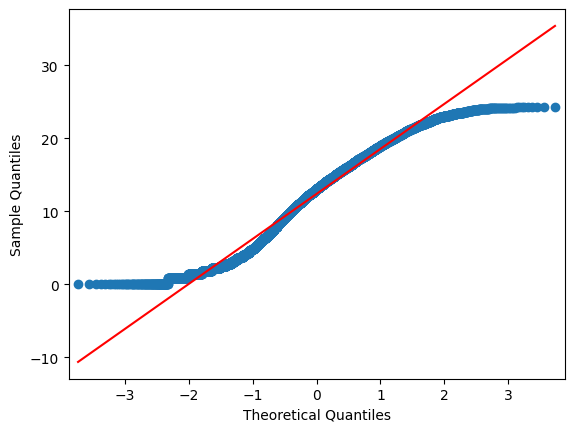


1. P Value for Shapiro : 0.2620205524381368
Failed to reject H0
Data is in Gaussian Distribution 

   season  boxcox_count
0       1      9.963894
1       2     13.042085
2       3     13.683273
3       4     12.793204 

2. P Value for Levene : 5.870673337615117e-13
Reject H0
Atleast one or more group have different variances 

One of the assumptions of ANOVA i.e., Equal variances failed hence we are proceeding with Kruskal Wallis Test 

3. P Value for Kruskal : 3.8591953474560567e-134
Reject H0
Atleast one or more season groups have different median which indicates that rental bike usage varies based on season


In [17]:
# Season Vs Usage of Rental Bikes
# As we are comparing one numerical variable against more than two categorical values we proceed with ANOVA Test
# Assumptions for ANOVA :
# 1. Normality in distribution
# 2. Independent Groups
# 3. Equal Variances

print("Test to check relation between Season and Usage of Rental Bikes","\n")
qqplot(data_new["boxcox_count"],line="s")
plt.show()
print()

# 1. Lets Test Normality of data with Shapiro Wilk Test
np.random.seed(42)
count_subset = data_new["boxcox_count"].sample(50)

s_stat, p_value = shapiro(count_subset)
print(f"1. P Value for Shapiro : {p_value}")
alpha = 0.05
# H0 : Data is in Gaussian Distribution
# H1 : Data is not in Gaussian Distribution
if p_value<alpha:
  print("Reject H0")
  print("Data is not in Gaussian Distribution","\n")
else:
  print("Failed to reject H0")
  print("Data is in Gaussian Distribution","\n")


# 3. Testing variances of the groups usinge levene test

print(data_new.groupby("season")["boxcox_count"].mean().reset_index(),"\n")

sea_1 = data_new[data_new["season"]==1]["boxcox_count"]
sea_2 = data_new[data_new["season"]==2]["boxcox_count"]
sea_3 = data_new[data_new["season"]==3]["boxcox_count"]
sea_4 = data_new[data_new["season"]==4]["boxcox_count"]

#H0 : All groups have same variances
#H1 : Atleat one or more group have different variances
l_stat,p_value = levene(sea_1,sea_2,sea_3,sea_4)
print(f"2. P Value for Levene : {p_value}")
if p_value<alpha:
  print("Reject H0")
  print("Atleast one or more group have different variances","\n")
else:
  print("Failed to reject H0")
  print("All groups have same variances","\n")

print("One of the assumptions of ANOVA i.e., Equal variances failed hence we are proceeding with Kruskal Wallis Test","\n")

# Kruskal Wallis Test to check if rental bike usage is same in all seasons or different
#H0 : Rental Bikes usage is same for all seasons
#H1 : Atleast one or more season groups have different rental bike usage.
f_stat, p_val = kruskal(sea_1,sea_2,sea_3,sea_4)
print(f"3. P Value for Kruskal : {p_val}")
if p_val<alpha:
  print("Reject H0")
  print("Atleast one or more season groups have different median which indicates that rental bike usage varies based on season")
else:
  print("Failed to Reject H0")
  print("All seasons have same median which indicates that rental Bikes usage is not dependent on seasons")


In [ ]:
# Weather Vs Usage of Rental Bikes
# As we are comparing one numerical variable against more than two categorical values we proceed with ANOVA Test
# Assumptions for ANOVA :
# 1. Normality in distribution
# 2. Independent Groups
# 3. Equal Variances
print("Test to check relation between weather and Usage of Rental Bikes","\n")

# 1. Lets Test Normality of data with Shapiro Wilk Test
np.random.seed(42)
count_subset = data_new["boxcox_count"].sample(50)

s_stat, p_value = shapiro(count_subset)
print(f"1. P Value for Shapiro : {p_value}")
alpha = 0.05
# H0 : Data is in Gaussian Distribution
# H1 : Data is not in Gaussian Distribution
if p_value<alpha:
  print("Reject H0")
  print("Data is not in Gaussian Distribution","\n")
else:
  print("Failed to reject H0")
  print("Data is in Gaussian Distribution","\n")


# 3. Testing variances of the groups usinge levene test
print(data_new.groupby("weather")["boxcox_count"].mean().reset_index(),"\n")
wea_1 = data_new[data_new["weather"]==1]["boxcox_count"]
wea_2 = data_new[data_new["weather"]==2]["boxcox_count"]
wea_3 = data_new[data_new["weather"]==3]["boxcox_count"]
wea_4 = data_new[data_new["weather"]==4]["boxcox_count"]

#H0 : All groups have same variances
#H1 : Atleat one or more group have different variances
l_stat,p_value = levene(wea_1,wea_2,wea_3,wea_4)
print(f"2. P Value for levene : {p_value}")
if p_value<alpha:
  print("Reject H0")
  print("Atleast one or more group have different variances","\n")
else:
  print("Failed to reject H0")
  print("All groups have same variances","\n")

print("As one of the assumptions of ANOVA i.e., Equal variances failed hence we are proceeding with Kruskal Wallis Test for analysis","\n")

# Kruskal Wallis Test to check if rental bike usage is same in all seasons or different
#H0 : Rental Bikes usage is same for all weather conditions
#H1 : Atleast one or more season groups have different rental bike usage.
f_stat, p_val = kruskal(wea_1,wea_2,wea_3,wea_4)
print(f"3. P Value for Kruskal : {p_val}")
if p_val<alpha:
  print("Reject H0")
  print("Atleast one or more season groups have different median which indicates that rental bike usage varies based on weather")
else:
  print("Failed to Reject H0")
  print("All seasons have same median which indicates that rental Bikes usage is not dependent on weather")


Test to check relation between weather and Usage of Rental Bikes 

1. P Value for Shapiro : 0.2620205524381368
Failed to reject H0
Data is in Gaussian Distribution 

   weather  boxcox_count
0        1     12.762529
1        2     12.115185
2        3      9.876945
3        4     13.983583 

2. P Value for levene : 4.189789512368691e-07
Reject H0
Atleast one or more group have different variances 

As one of the assumptions of ANOVA i.e., Equal variances failed hence we are proceeding with Kruskal Wallis Test for analysis 

3. P Value for Kruskal : 2.0444534638690485e-40
Reject H0
Atleast one or more season groups have different median which indicates that rental bike usage varies based on weather


In [21]:
# 2 Sample T Test to check effect of working/non-working day groups

working = data_new[data_new["workingday"]==1]["boxcox_count"]
non_working = data_new[data_new["workingday"]==0]["boxcox_count"]
alpha = 0.05

# Checking for equal variances as its one of the assumption of T Test
# H0 : Same variances between groups
# H1 : Different variances between groups
f_stat, p_val = levene(working,non_working)
print(f"P Value for Levene Test : {p_val}","\n")
if p_val<alpha:
  print("Reject H0")
  print("There is difference in variances of both groups, hence we are proceeding with Welch's Test","\n")
else:
  print("Failed to Reject H0")
  print("There is no difference in variances of both groups, hence we are proceeding with Student T Test","\n")


# H0 : Rental Bike count is same for both workingday and non workingday
# H1 : Rental Bike count on workingday is less than non workingday

print(data_new.groupby("workingday")["boxcox_count"].mean().reset_index(),"\n")

t_stat, p_value = ttest_ind(working,non_working,equal_var=True,alternative='less')

print(f"P Value for 2 Sample T Test: {p_value}")
if p_value<alpha:
  print("Reject H0")
  print("Rental Bike count on workingday is less than non workingday")
else:
  print("Failed to Reject H0")
  print("Rental Bike count is same for both workingday and non workingday")

P Value for Levene Test : 0.22663558256986197 

Failed to Reject H0
There is no difference in variances of both groups, hence we are proceeding with Student T Test 

   workingday  boxcox_count
0           0     12.569331
1           1     12.262185 

P Value for 2 Sample T Test: 0.008229051434007113
Reject H0
Rental Bike count on workingday is less than non workingday


In [ ]:
# Chi-Squared Test to check dependency of season on weather

observed = pd.crosstab(data_new["weather"],data_new["season"],margins=True)
print(f"Observed Data :","\n")
print(observed,"\n")
# H0 : season and weather are independent
# H1 : season and weather are not independent
chi_stat, p_value, dof, exp_freq = chi2_contingency(observed)
alpha = 0.05
print(f"P Value : {p_value}")
if p_value<alpha :
  print("Reject H0")
  print("Season and Weather are not independent, i.e., Both are dependent on each other")
else:
  print("Failed to Reject H0")
  print("Season and Weather are independent")

Observed Data : 

season      1     2     3     4    All
weather                               
1        1744  1721  1843  1657   6965
2         714   690   579   787   2770
3         211   223   195   221    850
4           1     0     0     0      1
All      2670  2634  2617  2665  10586 

P Value : 6.399631582402916e-05
Reject H0
Season and Weather are not independent, i.e., Both are dependent on each other


Max Temp : 41.0 and Min Temp : 0.82 

  temp_bin  boxcox_count
0   (0-10]      7.840054
1  (10-20]     11.369231
2  (20-30]     13.282971
3  (30-40]     17.354200
4  (40-50]     17.759596 

As we know that boxcox transformed count is in Gaussian distribution lets check equality of variances in temp groups 

P Value for Levene : 8.46166713248745e-72
Reject H0
Atleast one or more temperature groups have difference in variance hence we are now proceeding with Kruskal Wallis Test 

P Value for Kruskal Test : 0.0
Reject H0
Atleast one or more groups have difference in median, which means that rental bike count varies based on temperature 



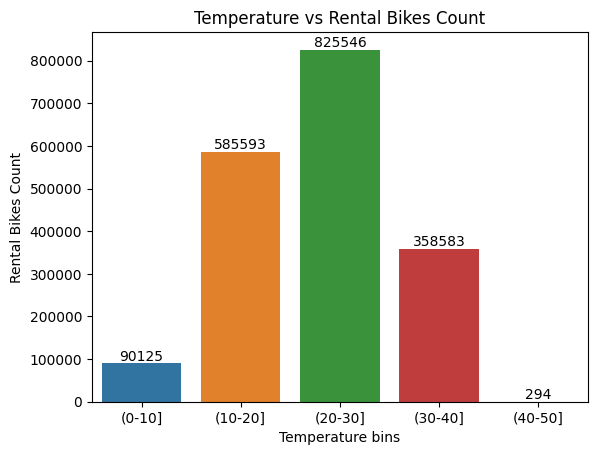

In [ ]:
# Test to check if temperature has any dependency on Rental Bike usage

min_tem = data_new["temp"].min()
max_tem = data_new["temp"].max()
print(f"Max Temp : {max_tem} and Min Temp : {min_tem}","\n")
alpha = 0.05
bins = [0,10,20,30,40,50]
labels = ["(0-10]","(10-20]","(20-30]","(30-40]","(40-50]"]
data_new["temp_bin"] = pd.cut(data_new["temp"],bins=bins,labels=labels)

print(data_new.groupby("temp_bin")["boxcox_count"].mean().reset_index(),"\n")

print("As we know that boxcox transformed count is in Gaussian distribution lets check equality of variances in temp groups","\n")
temp_0_10 = data_new[data_new["temp_bin"]=="(0-10]"]["boxcox_count"]
temp_10_20 = data_new[data_new["temp_bin"]=="(10-20]"]["boxcox_count"]
temp_20_30 = data_new[data_new["temp_bin"]=="(20-30]"]["boxcox_count"]
temp_30_40 = data_new[data_new["temp_bin"]=="(30-40]"]["boxcox_count"]
temp_40_50 = data_new[data_new["temp_bin"]=="(40-50]"]["boxcox_count"]

f_stat, p_value = levene(temp_0_10,temp_10_20,temp_20_30,temp_30_40,temp_40_50)
print(f"P Value for Levene : {p_value}")
#H0 : Variances among all the groups is same
#H1 : Atleast one or more groups have difference in variance

if p_value<alpha:
  print("Reject H0")
  print("Atleast one or more temperature groups have difference in variance hence we are now proceeding with Kruskal Wallis Test","\n")
else:
  print("Failed to Reject H0")
  print("Variance among all the temperature groups is same","\n")

# H0 : All the groups have same median
# H1 : Atleast one or more groups have difference in median

f_stat, p_value = kruskal(temp_0_10,temp_10_20,temp_20_30,temp_30_40,temp_40_50)
print(f"P Value for Kruskal Test : {p_value}")
if p_value<alpha:
  print("Reject H0")
  print("Atleast one or more groups have difference in median, which means that rental bike count varies based on temperature","\n")
else:
  print("Failed to Reject H0")
  print("All the groups have same median i.e., Rental bike usage is not dependent on temperature","\n")

temp_data = data_new.groupby("temp_bin")["count"].sum().reset_index()
ax1 = sns.barplot(x=temp_data["temp_bin"], y=temp_data["count"], hue=temp_data["temp_bin"])
plt.title("Temperature vs Rental Bikes Count")
plt.xlabel("Temperature bins")
plt.ylabel("Rental Bikes Count")
for j in ax1.containers:
  ax1.bar_label(j,)

Max humidity : 100 and Min humidity : 0 

    hum_bin  boxcox_count
0    (0-25]     16.028799
1   (25-50]     14.898083
2   (50-75]     12.302021
3  (75-100]      9.756308 

As we know that boxcox transformed count is in Gaussian distribution lets check equality of variances in humidity groups 

P Value for Levene : 6.653238699368098e-32
Reject H0
Atleast one or more temperature groups have difference in variance hence we are now proceeding with Kruskal Wallis Test 

P Value for Kruskal Test : 1.8096142550778444e-247
Reject H0
Atleast one or more groups have difference in median, which means that rental bike count varies based on humidity 



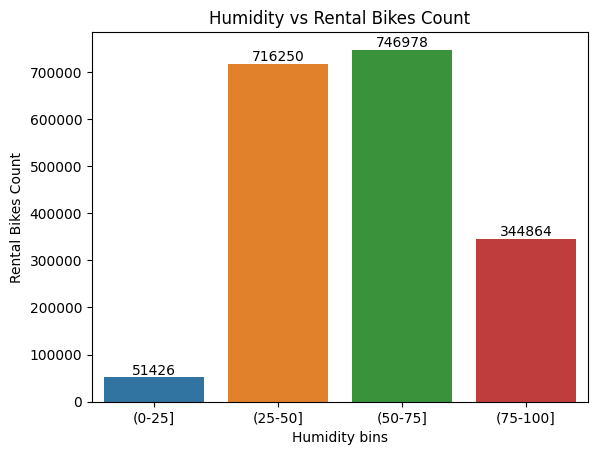

In [ ]:
# Test to check if temperature has any dependency on Rental Bike usage

min_hum = data_new["humidity"].min()
max_hum = data_new["humidity"].max()
print(f"Max humidity : {max_hum} and Min humidity : {min_hum}","\n")
alpha = 0.05
bins = [0,25,50,75,100]
labels = ["(0-25]","(25-50]","(50-75]","(75-100]"]
data_new["hum_bin"] = pd.cut(data_new["humidity"],bins=bins,labels=labels)

print(data_new.groupby("hum_bin")["boxcox_count"].mean().reset_index(),"\n")

print("As we know that boxcox transformed count is in Gaussian distribution lets check equality of variances in humidity groups","\n")
hum_0_25 = data_new[data_new["hum_bin"]=="(0-25]"]["boxcox_count"]
hum_25_50 = data_new[data_new["hum_bin"]=="(25-50]"]["boxcox_count"]
hum_50_75 = data_new[data_new["hum_bin"]=="(50-75]"]["boxcox_count"]
hum_75_100 = data_new[data_new["hum_bin"]=="(75-100]"]["boxcox_count"]

f_stat, p_value = levene(hum_0_25,hum_25_50,hum_50_75,hum_75_100)
print(f"P Value for Levene : {p_value}")
#H0 : Variances among all the groups is same
#H1 : Atleast one or more groups have difference in variance
f_stat, p_value = kruskal(hum_0_25,hum_25_50,hum_50_75,hum_75_100)
if p_value<alpha:
  print("Reject H0")
  print("Atleast one or more temperature groups have difference in variance hence we are now proceeding with Kruskal Wallis Test","\n")
else:
  print("Failed to Reject H0")
  print("Variance among all the temperature groups is same","\n")

# H0 : All the groups have same median
# H1 : Atleast one or more groups have difference in median


print(f"P Value for Kruskal Test : {p_value}")
if p_value<alpha:
  print("Reject H0")
  print("Atleast one or more groups have difference in median, which means that rental bike count varies based on humidity","\n")
else:
  print("Failed to Reject H0")
  print("All the groups have same median i.e., Rental bike usage is not dependent on humidity","\n")


hum_data = data_new.groupby("hum_bin")["count"].sum().reset_index()
ax2 = sns.barplot(x=hum_data["hum_bin"], y=hum_data["count"], hue=hum_data["hum_bin"])
plt.title("Humidity vs Rental Bikes Count")
plt.xlabel("Humidity bins")
plt.ylabel("Rental Bikes Count")
for k in ax2.containers:
  ax2.bar_label(k,)
plt.show()